<h4><b>The idea here is to experiment using autoencoder to remove anomalies such as noise, outliers , overlap etc to see the outcome of how efficient my models work on the dataset</b></h4>

In [18]:
# importing the necessary python Libraries
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [2]:
# the new dataset to work with
# Read the CSV new file
df = pd.read_csv("white_wine_cleaned.csv")

# the code below removes all the duplicate
df.drop_duplicates(keep=False, inplace=True)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5
11,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5
12,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5


In [4]:
# this checked to ensure there are no duplicates
df.duplicated().sum()

np.int64(0)

<Axes: >

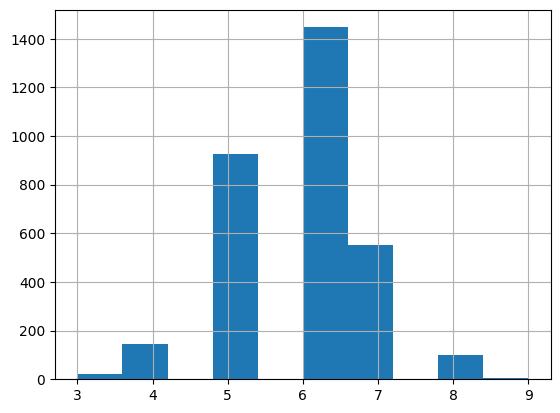

In [5]:
# this shows the histogram of 
# targeted variable "quality"
# the histogram plot shows that
# the 'quality' 6 is most represented
# follow by 5 and then 7
df["quality"].hist()

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# the train/test 
# X = the other variables that make the dataset
# and y which is the targeted variable
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y = df['quality']

<Axes: >

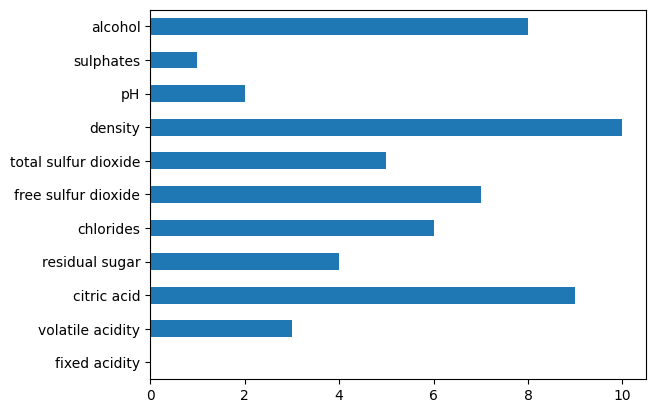

In [8]:
# I install 'pip install skfeature-chappers'
# sulphates is the lowest and 
# follow by pH, 
# fixed acidity is absolutely not existed 
# interestingly, the 'density' is the highest
# next by citric acid
# the variable 'alcohol' is quite high too
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

In [9]:
# the SelectKBest method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
6,total sulfur dioxide,2757.15
5,free sulfur dioxide,830.32
3,residual sugar,439.85
10,alcohol,114.43
1,volatile acidity,42.60
7,density,18.26
0,fixed acidity,8.51
2,citric acid,4.83
9,sulphates,2.41
8,pH,0.47


In [10]:

X = df.drop("quality", axis=1)
y = df['quality']


# Step 1: Scale the features for autoencoder
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 2: Define and train the autoencoder model
input_dim = X_scaled.shape[1]  # Number of features
autoencoder = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),  # Hidden layer 1
    Dense(32, activation='relu'),  # Hidden layer 2
    Dense(64, activation='relu'),  # Hidden layer 3
    Dense(input_dim, activation='linear')  # Output layer (reconstruction)
])

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, verbose=1)

c:\Users\User\AdvancedData2024\AdvDataAnalytics2024\venv310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.7795
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1176
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0387
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0234
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0179
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0120
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0101
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0086
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066
Epoch 13/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064
Epoch 14/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0056
Epoch 15/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [11]:
# Step 3: Detect anomalies using the autoencoder
reconstructed = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.square(X_scaled - reconstructed), axis=1)

# Define anomaly threshold (e.g., top 5% reconstruction error)
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

# anomalies threshold, this case top 5% is considered noise etc.
threshold = np.percentile(reconstruction_error, 95)

# get anomalies / noise etc.
anomalies = reconstruction_error > threshold
anomaly_indices = np.where(anomalies)[0]

# get the noisy/anomaly rows
anomaly_mask = df.index.isin(anomaly_indices)

df[anomaly_mask]

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
24,6.60,0.27,0.41,1.30,0.05,16.00,142.00,1.00,3.42,0.47,10.00,6
25,7.00,0.25,0.32,9.00,0.05,56.00,245.00,1.00,3.25,0.50,10.40,6
139,8.10,0.28,0.39,1.90,0.03,18.00,79.00,0.99,3.23,0.52,11.80,6
140,6.30,0.31,0.34,2.20,0.04,20.00,77.00,0.99,3.30,0.43,10.20,5
148,6.30,0.34,0.33,4.60,0.03,19.00,80.00,0.99,3.38,0.58,12.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...
3039,6.30,0.27,0.29,12.20,0.04,59.00,196.00,1.00,3.14,0.40,8.80,6
3069,7.00,0.53,0.43,6.10,0.03,6.00,76.00,0.99,3.08,0.50,12.50,8
3091,6.30,0.28,0.47,11.20,0.04,61.00,183.00,1.00,3.12,0.51,9.50,6
3102,6.50,0.29,0.26,7.00,0.04,18.00,113.00,0.99,3.17,0.38,10.20,6


In [12]:
# typical X/y -split
X = df.drop("quality", axis=1)
y = df['quality']

# a good idea: if you are going to use e.g. XGBoost for your actual ML model later
# use XGBoost also here, so that you get the optimal variables from the point of view of XGBoost
model = RandomForestRegressor()

# create RFE, place the model and choose amount of optimal variables
rfe = RFE(estimator=model, n_features_to_select=7)

# fit the RFE model with our data
rfe.fit(X, y)

# get rankings and the results
rankings = rfe.ranking_
support = rfe.support_

# build a new DataFrame just to show results of RFE
results_df = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rankings,
    "Selected": support
}).sort_values(by="Ranking")

# these results accompanied with any other knowledge you
# have regarding dataset (other analysis tools but also domain knowledge)
# you can decide the most important variables
results_df

,Feature,Ranking,Selected
1,volatile acidity,1,True
3,residual sugar,1,True
6,total sulfur dioxide,1,True
5,free sulfur dioxide,1,True
9,sulphates,1,True
10,alcohol,1,True
8,pH,1,True
0,fixed acidity,2,False
4,chlorides,3,False
2,citric acid,4,False


In [13]:
# Assuming 'lr_results_df' contains the RFE results for LinearRegression
# Extract the selected features based on RFE
selected_features = results_df[results_df["Selected"] == True]["Feature"].tolist()

In [14]:
# Prepare the dataset with selected features
X_selected = X[selected_features]
y = df["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = RandomForestRegressor()
lr_model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
# Make predictions on the test set
# y_pred = lr_model.predict(X_test)
test_predictions = lr_model.predict(X_test)

In [16]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "%")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "%^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "%")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
0.58 %

MSE
0.6 %^2

RMSE:
0.77 %

R-squared:
0.32

Explained variance score:
0.32


<h4><b>Below is my evaluation metrics for the RandomForestRegressor model that shows following performance</b></h4>
<ul>
<li><b>MAE</b>- the Mean Absolute Error, it is the average absolute difference between the predicted and actual values is 0.58%. I would say it is low value which suggests the model predictions are, on average, quite close to the actual values.</li>


<li><b>MSE</b>- Mean Squared Error, that is the average squared difference between the predicted and actual values is 0.59%². The larger the errors the more heavily the model is penalized in MSE but in this case it indicates that large prediction errors are infrequent, meaning the model generally makes predictions close to the actual values. The model does not have significant large prediction errors.</li>


<li><b>RMSE</b>- Root Mean Squared Error, this measures the square root of the MSE and represents the standard deviation of the prediction errors. At 0.77%, though the typical prediction error is slightly higher than the MAE however, I think it is still reasonable.</li>


<li><b>R-squared</b>- I think this shows that the model explains 33% of the variance in the target variable. While the model captures some patterns in the data, a higher R² which is close to 1 would indicate a better fit I would say.</li>


<li><b>Explained variance score</b>- when observed it is same as R-squared(R²) and it measures how well the model accounts for the variance in the data. A score of 0.33 perhaps suggests that while the model provides some insights, there is strong room for its predictive performance to be improved.</li>
</ul>

<h4>I would say that the error metrics -MAE, MSE, and RMSE are low, which suggests that the model makes relatively accurate predictions on average.
However, the low R² and explained variance score (33%) indicate that the model is not capturing all the variability in the data. That would probably suggests trying another model such as XGBoost to achieve optimisation</h4>

In [19]:
# typical X/y -split
X = df.drop("quality", axis=1)
y = df['quality']

# Encode target variable to start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Verify unique values before proceeding
print(f"Original y classes: {y.unique()}")
print(f"Encoded y classes: {np.unique(y_encoded)}")

# a good idea: if you are going to use e.g. XGBoost for your actual ML model later
# use XGBoost also here, so that you get the optimal variables from the point of view of XGBoost
model = XGBRegressor()

# create RFE, place the model and choose amount of optimal variables
rfe = RFE(estimator=model, n_features_to_select=7)

# fit the RFE model with our data
rfe.fit(X, y)

# get rankings and the results
rankings = rfe.ranking_
support = rfe.support_

# build a new DataFrame just to show results of RFE
results_df = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rankings,
    "Selected": support
}).sort_values(by="Ranking")

# these results accompanied with any other knowledge you
# have regarding dataset (other analysis tools but also domain knowledge)
# you can decide the most important variables
results_df

Original y classes: [6 5 7 8 4 3 9]
Encoded y classes: [0 1 2 3 4 5 6]


,Feature,Ranking,Selected
1,volatile acidity,1,True
7,density,1,True
6,total sulfur dioxide,1,True
5,free sulfur dioxide,1,True
9,sulphates,1,True
10,alcohol,1,True
8,pH,1,True
3,residual sugar,2,False
4,chlorides,3,False
2,citric acid,4,False


In [20]:
# Extract the selected features based on RFE
selected_features = results_df[results_df["Selected"] == True]["Feature"].tolist()

In [21]:
# Prepare the dataset with selected features
X_selected = X[selected_features]
y = df["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

# Automatically match number of classes
model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_encoded)),
    # num_class=6,
    n_estimators = 300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [22]:
test_predictions = model.predict(X_test)

<Axes: >

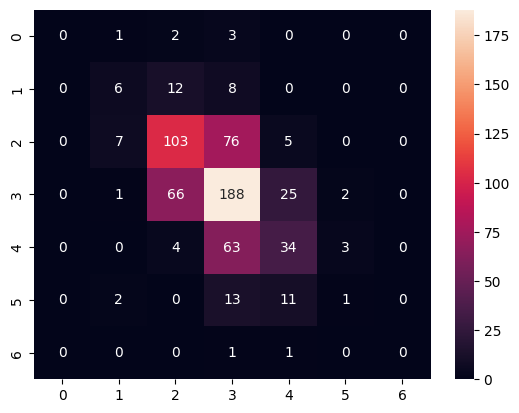

In [23]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

In [24]:
# visualization on the 
# precision,
# recall,
# f1-score,
# and the accuracy
print(classification_report(y_test, test_predictions))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.35      0.23      0.28        26
           2       0.55      0.54      0.54       191
           3       0.53      0.67      0.59       282
           4       0.45      0.33      0.38       104
           5       0.17      0.04      0.06        27
           6       0.00      0.00      0.00         2

    accuracy                           0.52       638
   macro avg       0.29      0.26      0.27       638
weighted avg       0.50      0.52      0.50       638


Model overall accuracy: 52.04%


c:\Users\User\AdvancedData2024\AdvDataAnalytics2024\venv310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AdvancedData2024\AdvDataAnalytics2024\venv310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AdvancedData2024\AdvDataAnalytics2024\venv310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

<h4>My Analysis on the Precision, Recall, F1-Score, and Support for Each Class</h4>
<ul>
<li>Class 0: Poor performance; the model does not correctly identify any instances of this class.

Precision, Recall, F1-Score: 0.00


Support: 6 (very low frequency, perhaps reason the poor performance).</li>
<li>Class 1: I think this is moderate performance but still a room for improvement.

Precision: 0.35
(35% of predicted Class 1 instances are correct).


Recall: 0.23
(23% of actual Class 1 instances are correctly predicted).


F1-Score: 0.28 (harmonic mean of precision and recall).


Support: 26 (low frequency, may contribute to lower metrics).</li>
<li>Class 2: here, the model performs reasonably well.

Precision: 0.55
(55% of predicted Class 2 instances are correct).


Recall: 0.54
(54% of actual Class 2 instances are correctly predicted).


F1-Score: 0.54 (balanced performance).


Support: 191 (this class has a higher frequency, tending towards a better performance).</li>
<li>Class 3: I think Class 3 would probably be the best performing class with the highest recall.

Precision: 0.53
(53% of predicted Class 3 instances are correct).


Recall: 0.67
(67% of actual Class 3 instances are correctly predicted).


F1-Score: 0.59 (shows strong performance overall).


Support: 282 (most frequent class, and contributes to higher accuracy).</li>
<li>Class 4: this class is moderatly performing but less effective than Classes 2 and 3 from the below metrics.

Precision: 0.45


Recall: 0.33


F1-Score: 0.38


Support: 104.</li>
<li>Class 5: this class has a poor performance, which I think could be due to the class imbalance.

Precision: 0.17


Recall: 0.04


F1-Score: 0.06


Support: 27.</li>
<li>Class 6: again, this class has a very poor performance, and it be because of the extremely low support.

Precision, Recall, F1-Score: 0.00


Support: 2.</li>
</ul>

<h4>I think I can notice from above that there is class imbalance- which I would say makes the performance to highly skewed towards more frequent classes such as Class 3 and Class 2, while rare classes as Classes 0, 5, and 6 have poor precision, recall, and F1-scores. This suggests the model is biased towards the majority classes.




Accuracy- the model correctly classifies 52.04% of the samples. This indicates moderate performance but suggests significant room for improvement. And I would say that the model's overall accuracy of 52.04% is slightly better than random guessing (if all classes were equally likely), but it indicates that the model is not generalizing well to all classes.

Subsquently, there is need to address the Class Imbalance by using techniques like oversampling such SMOTE, CTGAN, ADAYSN, and EditedNearestNeighbours undersampling, or class weighting to give more importance to underrepresented classes just as demonstrated in Exercise Project 2.</h4>
